**Description of work:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
Predict behavior to retain customers.
 You need analyze all relevant customer data and predict churn.
_________

[Codebook](#Codebook) <br>
[1. Data Description](#1.-Data-Description)<br>
[2. Exploring dependencies and formulating hypotheses](#2.-Exploring-dependencies-and-formulating-hypotheses)<br>
[3. Building Models to Predict Churn](#3.-Building-Models-to-Predict-Churn)<br>
[4. Model Quality Comparison in Test Data](#4.-Model-Quality-Comparison-in-Test-Data) <br>


## Codebook
<br>

`telecom_users.csv` - contains the following values:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – Customer ID<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – Whether the customer is a male or a female<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – Whether the customer is a senior citizen or not (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – Whether the customer has a partner or not (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – Whether the customer has dependents or not (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – Number of months the customer has stayed with the company<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – Whether the customer has a phone service or not (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – Whether the customer has multiple lines or not (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – Customer’s internet service provider (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – Whether the customer has online security or not (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – Whether the customer has online backup or not (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – Whether the customer has device protection or not (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – Whether the customer has tech support or not (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – Whether the customer has streaming TV or not (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – Whether the customer has streaming movies or not (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – The contract term of the customer (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – Whether the customer has paperless billing or not (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – The amount charged to the customer monthly<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – The total amount charged to the customer<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – Whether the customer churned or not (Yes or No)<br>

# 1. Data Description

In [1]:
#Importing  the necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [2]:
#Loading data
data = pd.read_csv('telecom_users.csv', index_col=0, parse_dates = True )
data.sort_index(inplace=True)
data.reset_index(inplace=True)
#Moving target in a separate variable and replace Yes and No with 1 and 0 respectively
targets = (data.Churn == 'Yes' ).astype(int)
data.drop('Churn',axis=1, inplace=True)
data.drop('customerID',axis=1, inplace=True)
#Replace empty string with 0 in TotalCharges
data['TotalCharges'].replace(' ',0,inplace= True)
data.TotalCharges = data.TotalCharges.astype(float,)
#Performing data output
data_original = data.copy()
data.tail()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5981,7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
5982,7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
5983,7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
5984,7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60
5985,7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50


In [3]:
#Customer churn percent
print(f'The churn percentage is -  {round(targets.values.sum()/len(targets)*100,2)}%')

The churn percentage is -  26.51%


In [4]:
#Perform data preparation. To do this, we convert all values to numerical forms
#Replace binary data with 0 and 1
gender = {'Male':0 , 'Female':1,}
yes_no = {'Yes':1 , 'No':0,}

data.gender.replace(gender,inplace= True)
data['Partner'].replace(yes_no,inplace= True)
data['Dependents'].replace(yes_no,inplace= True)
data['PhoneService'].replace(yes_no,inplace= True)
data['PaperlessBilling'].replace(yes_no,inplace= True)

#Part of the data contains 3 typical values, but in fact, given the other data, they can be converted to binary
yes_no_no = {'Yes':1 , 'No':0, 'No internet service' : 0 ,'No phone service' : 0,}
data['MultipleLines'].replace(yes_no_no,inplace= True)
data['OnlineSecurity'].replace(yes_no_no,inplace= True)
data['OnlineBackup'].replace(yes_no_no,inplace= True)
data['DeviceProtection'].replace(yes_no_no,inplace= True)
data['TechSupport'].replace(yes_no_no,inplace= True)
data['StreamingTV'].replace(yes_no_no,inplace= True)
data['StreamingMovies'].replace(yes_no_no,inplace= True)

In [5]:
#For other data with multiple values, used OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype = int, sparse=True)
data_onehot = pd.DataFrame(
    onehot.fit_transform(data[['InternetService', 'Contract', 'PaymentMethod']])\
    .toarray(),
    columns=['DSL','Fiber_optic','No_InternetService' , 'Month_to_month','One_year', \
             'Two_year','Bank_transfer','Credit_card','Electronic_check', 'Mailed_check',])

In [6]:
data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   DSL                 5986 non-null   int64
 1   Fiber_optic         5986 non-null   int64
 2   No_InternetService  5986 non-null   int64
 3   Month_to_month      5986 non-null   int64
 4   One_year            5986 non-null   int64
 5   Two_year            5986 non-null   int64
 6   Bank_transfer       5986 non-null   int64
 7   Credit_card         5986 non-null   int64
 8   Electronic_check    5986 non-null   int64
 9   Mailed_check        5986 non-null   int64
dtypes: int64(10)
memory usage: 467.8 KB


In [7]:
#Dropping unwanted columns
data.drop(['InternetService', 'Contract', 'PaymentMethod'], axis = 1 ,inplace=True)

In [8]:
#Prepare the final DataFrame for work
features = pd.merge(data,data_onehot,how='inner',left_index = True, right_index=True)
features['Churn'] = targets
features[['OnlineSecurity' ,'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', \
        'StreamingMovies']] = features[['OnlineSecurity' ,'OnlineBackup','DeviceProtection',\
        'TechSupport','StreamingTV','StreamingMovies']].astype(int)

features.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Fiber_optic,No_InternetService,Month_to_month,One_year,Two_year,Bank_transfer,Credit_card,Electronic_check,Mailed_check,Churn
0,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,34,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,0,0,0,2,1,0,1,1,...,0,0,1,0,0,0,0,0,1,1
3,3,0,0,0,0,45,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,4,1,0,0,0,2,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1


In [9]:
#data info
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5986 non-null   int64  
 1   gender              5986 non-null   int64  
 2   SeniorCitizen       5986 non-null   int64  
 3   Partner             5986 non-null   int64  
 4   Dependents          5986 non-null   int64  
 5   tenure              5986 non-null   int64  
 6   PhoneService        5986 non-null   int64  
 7   MultipleLines       5986 non-null   int64  
 8   OnlineSecurity      5986 non-null   int64  
 9   OnlineBackup        5986 non-null   int64  
 10  DeviceProtection    5986 non-null   int64  
 11  TechSupport         5986 non-null   int64  
 12  StreamingTV         5986 non-null   int64  
 13  StreamingMovies     5986 non-null   int64  
 14  PaperlessBilling    5986 non-null   int64  
 15  MonthlyCharges      5986 non-null   float64
 16  TotalC

In [10]:
#Function that allows you to display basic statistics
def my_statistics(ncol):
    '''Calculate statistics by column'''
    if ncol.name in ['tenure','MonthlyCharges','TotalCharges']:
        describe = ncol.describe().to_dict()
        result = ['  '+i + '  ' + str(describe[i])[:4]+',' for i in describe]
        result_str = result[1]+result[2]+result[3]+result[5]+result[7]
        print(f'{ncol.name} : {result_str[:-1]}' )
    else :
        #Churn percentage
        print(f'{ncol.name} is -  {round(ncol.sum()/len(ncol)*100,ndigits=2)}%')
    pass

In [11]:
#Distribution of categorical features
for i in features.columns:
    my_statistics(features[i])

index is -  353356.13%
gender is -  49.05%
SeniorCitizen is -  16.14%
Partner is -  48.51%
Dependents is -  29.92%
tenure :   mean  32.4,  std  24.5,  min  0.0,  50%  29.0,  max  72.0
PhoneService is -  90.14%
MultipleLines is -  42.57%
OnlineSecurity is -  28.62%
OnlineBackup is -  34.91%
DeviceProtection is -  34.33%
TechSupport is -  28.98%
StreamingTV is -  38.52%
StreamingMovies is -  39.07%
PaperlessBilling is -  58.94%
MonthlyCharges :   mean  64.8,  std  30.1,  min  18.2,  50%  70.4,  max  118.
TotalCharges :   mean  2294,  std  2274,  min  0.0,  50%  1408,  max  8684
DSL is -  34.55%
Fiber_optic is -  43.89%
No_InternetService is -  21.57%
Month_to_month is -  54.61%
One_year is -  21.32%
Two_year is -  24.07%
Bank_transfer is -  21.85%
Credit_card is -  21.77%
Electronic_check is -  33.51%
Mailed_check is -  22.87%
Churn is -  26.51%


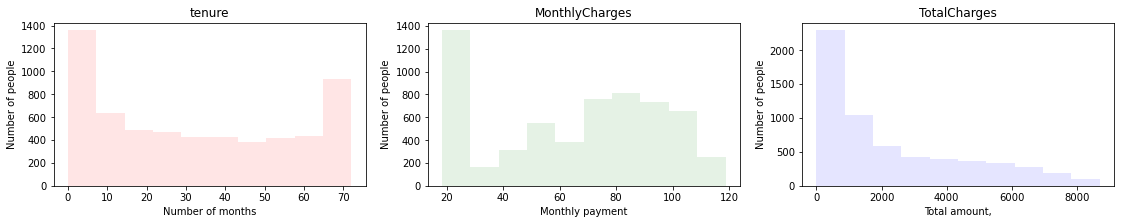

In [12]:
#Distribution of numerical features
fig, plot = plt.subplots(nrows=1,ncols=3)
fig.set_figwidth(19)    
fig.set_figheight(3)

plot[0].hist(features.tenure.values, alpha = 0.1, color = 'r')
plot[0].set_title(features.tenure.name)
plot[0].set_ylabel('Number of people')    
plot[0].set_xlabel('Number of months')

plot[1].hist(features.MonthlyCharges.values, alpha = 0.1, color = 'g')
plot[1].set_title(features.MonthlyCharges.name)
plot[1].set_ylabel('Number of people')    
plot[1].set_xlabel('Monthly payment')

plot[2].hist(features.TotalCharges.values, alpha = 0.1, color = 'b')
plot[2].set_title(features.TotalCharges.name)
plot[2].set_ylabel('Number of people')    
plot[2].set_xlabel('Total amount,')

plt.show()

# 2. Exploring dependencies and formulating hypotheses

Distribution of users from the number of months that a person has been a client of the company

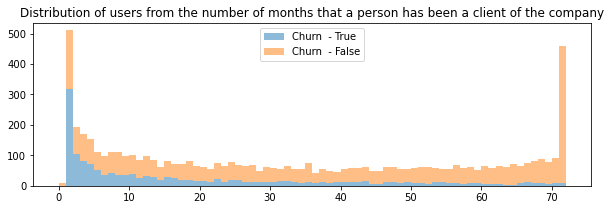

In [13]:
#Histogram distribution of users from the number of months that a person has been a client of the company
fig, plot = plt.subplots()
fig.set_figwidth(10)    
fig.set_figheight(3)

plot.hist(x = [features[(targets == 1)].tenure.values,features[(targets == 0)].tenure.values], 
          alpha=0.5,bins=72, histtype='barstacked', label = ['Churn  - True','Churn  - False'] )
plt.title('Distribution of users from the number of months that a person has been a client of the company')
plt.legend()
plt.show()

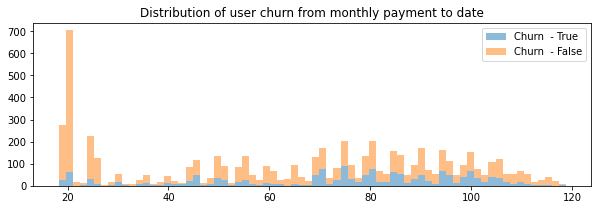

In [14]:
#Histogram distribution of user churn from monthly payment to date
fig, plot = plt.subplots()
fig.set_figwidth(10)    
fig.set_figheight(3)

plot.hist(x = [features[(targets == 1)].MonthlyCharges.values,features[(targets == 0)].MonthlyCharges.values], 
          alpha=0.5,bins=72, histtype='barstacked', label = ['Churn  - True','Churn  - False'] )
plt.title('Distribution of user churn from monthly payment to date')
plt.legend()
plt.show()

Since the rest of the features are binary, for them we simply consider the correlation relative to the target

In [15]:
#consider the correlation relative to the target
cor = features.corr()['Churn']
cor

index                 0.006630
gender                0.009548
SeniorCitizen         0.150097
Partner              -0.146840
Dependents           -0.160204
tenure               -0.348469
PhoneService          0.009421
MultipleLines         0.036342
OnlineSecurity       -0.174301
OnlineBackup         -0.082648
DeviceProtection     -0.070000
TechSupport          -0.161821
StreamingTV           0.060379
StreamingMovies       0.058865
PaperlessBilling      0.188996
MonthlyCharges        0.186753
TotalCharges         -0.196390
DSL                  -0.120394
Fiber_optic           0.300898
No_InternetService   -0.223860
Month_to_month        0.403907
One_year             -0.175855
Two_year             -0.301906
Bank_transfer        -0.112447
Credit_card          -0.135232
Electronic_check      0.296803
Mailed_check         -0.090066
Churn                 1.000000
Name: Churn, dtype: float64

# 3. Building Models to Predict Churn

In [16]:
import warnings
warnings.filterwarnings('ignore')

#Importing  the necessary libraries
from sklearn.metrics import f1_score, recall_score, accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

#Setting random_seed
SEED = 37
np.random.seed = 37
np.seed = 37

#Separating the data into train and test
X, x_test, y, y_test = train_test_split(features.iloc[:,:-1],features.Churn, random_state=SEED,)

In [17]:
#GridSearchCV and RandomForestClassifier
parameters = {'max_depth':[2,3,4,5,6,7],} 
svc = RandomForestClassifier(random_state = SEED)
clf = GridSearchCV(svc, parameters, return_train_score=True, scoring = 'f1')
clf.fit(X, y, )

RandomForest = clf.best_estimator_
print(f'Score  : {clf.best_score_}')
print(f'Model: \n{RandomForest}')

Score  : 0.555963581041407
Model: 
RandomForestClassifier(max_depth=7, random_state=37)


In [18]:
#GridSearchCV and SVC
parameters = {'C':[0,1,5,10], }
svc =  SVC(random_state = SEED)
clf = GridSearchCV(svc, parameters, return_train_score=True, scoring = 'f1')
clf.fit(X, y, )

Svc = clf.best_estimator_
print(f'Score  : {clf.best_score_}')
print(f'Model: \n{Svc}')

Score  : 0.0
Model: 
SVC(C=1, random_state=37)


In [19]:
#GridSearchCV and KNeighborsClassifie
parameters = {'n_neighbors':[5,10,15,50,100],} 
svc =  KNeighborsClassifier()
clf = GridSearchCV(svc, parameters, return_train_score=True, scoring = 'f1')
clf.fit(X, y, )

KNeighbors = clf.best_estimator_
print(f'Score  : {clf.best_score_}')
print(f'Model: \n{KNeighbors}')

Score  : 0.3291432725602567
Model: 
KNeighborsClassifier()


In [20]:
#GridSearchCV and LogisticRegression
parameters = parameters = {'C':list(range(1,21))}
svc =  LogisticRegression(random_state = SEED)
clf = GridSearchCV(svc, parameters,return_train_score=True,  scoring = 'f1')
clf.fit(X, y, )

Logistic = clf.best_estimator_
print(f'Score  : {clf.best_score_}')
print(f'Model: \n{Logistic}')

Score  : 0.5807331383755943
Model: 
LogisticRegression(C=9, random_state=37)


In [21]:
#GridSearchCV and GaussianNB
parameters = parameters = {}
svc =  GaussianNB()
clf = GridSearchCV(svc, parameters, return_train_score=True, scoring = 'f1')
clf.fit(X, y, )

Gaussian = clf.best_estimator_
print(f'Score  : {clf.best_score_}')
print(f'Model: \n{Gaussian}')

Score  : 0.6165261166079656
Model: 
GaussianNB()


# 4. Model Quality Comparison in Test Data

In [22]:
print (f'''Model:\n {Gaussian}
accuracy     : {accuracy_score(y_test, Gaussian.predict(x_test))}
roc_auc      : {roc_auc_score(y_test, Gaussian.predict(x_test))}
recall_score : {recall_score(y_test, Gaussian.predict(x_test))}
f1           : {f1_score(y_test, Gaussian.predict(x_test))}''')

Model:
 GaussianNB()
accuracy     : 0.7341349365397462
roc_auc      : 0.7491898875619806
recall_score : 0.7803617571059431
f1           : 0.6027944111776448


In [23]:
print (f'''Model:\n {RandomForest}
accuracy     : {accuracy_score(y_test, RandomForest.predict(x_test))}
roc_auc      : {roc_auc_score(y_test, RandomForest.predict(x_test))}
recall_score : {recall_score(y_test, RandomForest.predict(x_test))}
f1           : {f1_score(y_test, RandomForest.predict(x_test))}''')

Model:
 RandomForestClassifier(max_depth=7, random_state=37)
accuracy     : 0.8089512358049432
roc_auc      : 0.7222187303582653
recall_score : 0.5426356589147286
f1           : 0.5949008498583569


In [24]:
print (f'''Model:\n {Logistic}
accuracy     : {accuracy_score(y_test, Logistic.predict(x_test))}
roc_auc      : {roc_auc_score(y_test, Logistic.predict(x_test))}
recall_score : {recall_score(y_test, Logistic.predict(x_test))}
f1           : {f1_score(y_test, Logistic.predict(x_test))}''')

Model:
 LogisticRegression(C=9, random_state=37)
accuracy     : 0.8109552438209753
roc_auc      : 0.7336685522732035
recall_score : 0.5736434108527132
f1           : 0.610729023383769


In [25]:
print (f'''Model:\n {KNeighbors}
accuracy     : {accuracy_score(y_test, KNeighbors.predict(x_test))}
roc_auc      : {roc_auc_score(y_test, KNeighbors.predict(x_test))}
recall_score : {recall_score(y_test, KNeighbors.predict(x_test))}
f1           : {f1_score(y_test, KNeighbors.predict(x_test))}''')

Model:
 KNeighborsClassifier()
accuracy     : 0.7181028724114896
roc_auc      : 0.5709127732383545
recall_score : 0.2661498708010336
f1           : 0.3280254777070064


In [26]:
print (f'''Model:\n {Svc}
accuracy : {accuracy_score(y_test, Svc.predict(x_test))}
roc_auc : {roc_auc_score(y_test, Svc.predict(x_test))}
recall_score : {recall_score(y_test, Svc.predict(x_test))}
f1 : {f1_score(y_test, Svc.predict(x_test))}''')

Model:
 SVC(C=1, random_state=37)
accuracy : 0.7414829659318637
roc_auc : 0.5
recall_score : 0.0
f1 : 0.0


### CatBoostClassifier
____________

In [27]:
from catboost import CatBoostClassifier

In [28]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations = 25,
                           learning_rate = 1,
                           use_best_model = True,                      
                           depth=4,
                           random_seed = 35,
                           custom_metric = ['F1'])

# Fit model
model.fit(X, y,eval_set = (x_test,y_test),verbose=False)
# Get predicted classes
preds_class = model.predict(x_test)

print (f'''Best model:\n CatBoostClassifier
accuracy : {accuracy_score(y_test, preds_class)}
roc_auc : {roc_auc_score(y_test, preds_class)}
recall_score : {recall_score(y_test, preds_class)}
f1 : {f1_score(y_test, preds_class)}''')

Best model:
 CatBoostClassifier
accuracy : 0.8036072144288577
roc_auc : 0.727030518890984
recall_score : 0.5684754521963824
f1 : 0.5994550408719346


### Prediction with original data
________

In [29]:
#data info
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             5986 non-null   int64  
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [30]:
#setting categorical features
cat_features = [1,3,4,6,7,8,9,10,11,12,13,14,15,16,17,]

In [31]:
#Separating the data into train and test
X, x_test, y, y_test = train_test_split(data_original,targets,random_state=SEED,)

In [32]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations = 25,
                           learning_rate = 1,
                           use_best_model = True,                      
                           depth=4,
                           random_seed = 37,
                           custom_metric=['F1'])

# Fit model
model.fit(X, y,eval_set = (x_test,y_test), cat_features=cat_features,verbose=False)
# Get predicted classes
preds_class = model.predict(x_test)

print(f'''Best model:\n CatBoostClassifier
accuracy : {accuracy_score(y_test, preds_class)}
roc_auc : {roc_auc_score(y_test, preds_class)}
recall_score : {recall_score(y_test, preds_class)}
f1 : {f1_score(y_test, preds_class)}
''')

Best model:
 CatBoostClassifier
accuracy : 0.8076152304609219
roc_auc : 0.7280501431664222
recall_score : 0.5633074935400517
f1 : 0.6022099447513811

